## 1- Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 2- Loading Image

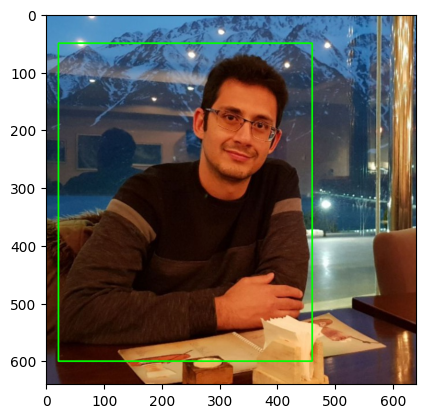

In [2]:
img = cv2.imread('images/akhavan.jpg')

rect = (21,50,460,600)
cv2.rectangle(img, (rect[0], rect[1]), (rect[2], rect[3]), (0,255,0), 2)

plt.imshow(img[...,::-1])

## 3- Binary Mask

Text(0.5, 1.0, 'result')

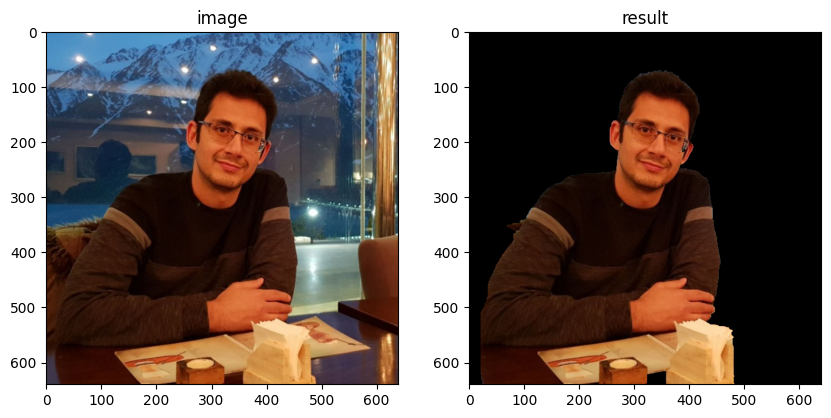

In [3]:
img = cv2.imread('images/akhavan.jpg')

mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (21,50,460,600)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
result = img*mask2[:,:,np.newaxis]

plt.figure(figsize=[10,5])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("image")
plt.subplot(122);plt.imshow(result[...,::-1]);plt.title("result")

### Cheking the Mask

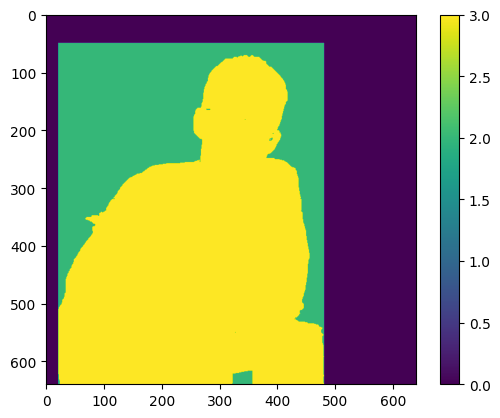

In [4]:
plt.imshow(mask);plt.colorbar();plt.show()

`cv2.GC_BGD` or `0` defines an **obvious background** pixels.

`cv2.GC_FGD` or `1` defines an **obvious foreground (object)** pixel.

`cv2.GC_PR_BGD` or `2` defines a **possible background** pixel.

`cv2.GC_PR_FGD` or `3` defines a **possible foreground** pixel.

In [5]:
np.unique(mask)

array([0, 2, 3], dtype=uint8)

### more user interaction

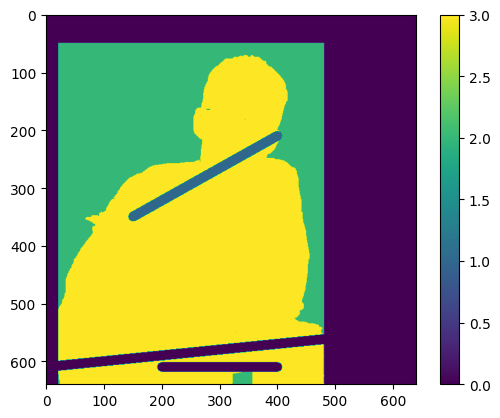

In [6]:
cv2.line(mask, (0,610), (600,550), cv2.GC_BGD, 15)
cv2.line(mask, (200,610), (400,610), cv2.GC_BGD, 15)
cv2.line(mask, (150,350), (400,210), cv2.GC_FGD, 15)

plt.imshow(mask);plt.colorbar();plt.show()

Text(0.5, 1.0, 'result')

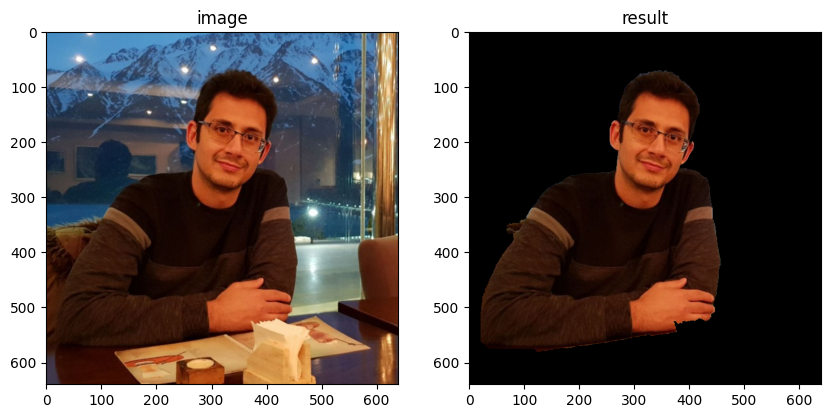

In [7]:
img = cv2.imread('images/akhavan.jpg')

bgdmodel = np.zeros((1, 65), np.float64)
fgdmodel = np.zeros((1, 65), np.float64)
cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

mask2 = np.where((mask==cv2.GC_PR_BGD)|(mask==cv2.GC_BGD),0,1).astype('uint8')
result = img*mask2[:,:,np.newaxis]

plt.figure(figsize=[10,5])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("image")
plt.subplot(122);plt.imshow(result[...,::-1]);plt.title("result")

## 4- Background Removal Application

Text(0.5, 1.0, 'Output')

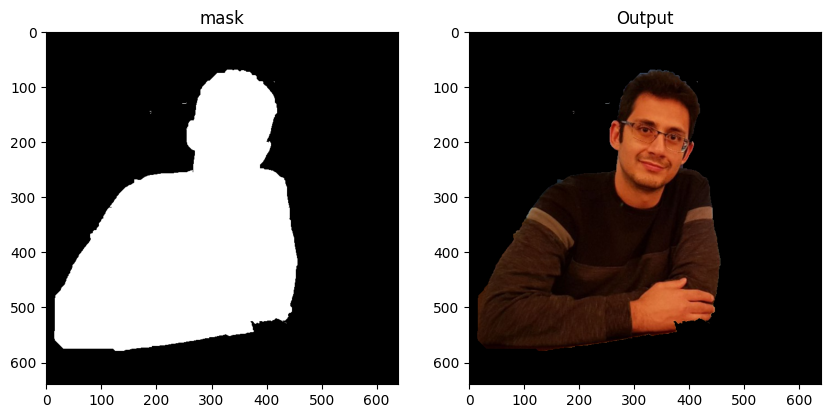

In [11]:
draw_rectangle = False
drawing = False
rect_or_mask = -1
rect_is_drawed = False

def onmouse(event, x, y, flags, param):
    # Draw Rectangle
    global draw_rectangle, start_point, rect, drawing, rect_or_mask, draw_image, rect_is_drawed
    if event == cv2.EVENT_RBUTTONDOWN:
        draw_rectangle = True
        start_point = (x, y)

    elif event == cv2.EVENT_MOUSEMOVE:
        if draw_rectangle:
            draw_image = image.copy()
            cv2.rectangle(draw_image, start_point, (x, y), (255,0,0), 2)

    elif event == cv2.EVENT_RBUTTONUP:
        draw_rectangle = False
        cv2.rectangle(draw_image, start_point, (x, y), (255,0,0), 2)
        rect = (min(start_point[0], x), min(start_point[1], y), abs(start_point[0] - x), abs(start_point[1] - y))
        rect_is_drawed = True
        rect_or_mask = 0
    # draw touchup curves
    if event == cv2.EVENT_LBUTTONDOWN:
        if not rect_is_drawed:
            print("first draw rectangle \n")
        else:
            drawing = True
            cv2.circle(draw_image, (x,y), 3, value['color'], -1)
            cv2.circle(mask, (x,y), 3, value['val'], -1)

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.circle(draw_image, (x, y), 3, value['color'], -1)
            cv2.circle(mask, (x, y), 3, value['val'], -1)

    elif event == cv2.EVENT_LBUTTONUP:
        if drawing == True:
            drawing = False


image = cv2.imread('images/akhavan.jpg')
draw_image = image.copy()                               # a copy of original image
mask = np.zeros(image.shape[:2], dtype = np.uint8)      # mask initialized to PR_BG
output = np.zeros(image.shape, np.uint8)                # output image to be shown

# input and output windows
cv2.namedWindow('output')
cv2.namedWindow('input')
cv2.setMouseCallback('input', onmouse)

DRAW_BG = {'color' : (0,0,0), 'val' : 0}
DRAW_FG = {'color' : (255,255,255), 'val' : 1}


while True:

    cv2.imshow('output', output)
    cv2.imshow('input', draw_image)
    k = cv2.waitKey(1)
    # key bindings
    if k == 27:         # esc to exit
        break
    elif k == ord('0'): # BG drawing
        value = DRAW_BG
    elif k == ord('1'): # FG drawing
        value = DRAW_FG
    elif k == ord('n'): # segment the image
        bgdmodel = np.zeros((1, 65), np.float64)
        fgdmodel = np.zeros((1, 65), np.float64)
        if rect_or_mask == 0:         # grabcut with rect
            cv2.grabCut(image, mask, rect, bgdmodel, fgdmodel, 1, cv2.GC_INIT_WITH_RECT)
            rect_or_mask = 1
        elif rect_or_mask == 1:       # grabcut with mask
            cv2.grabCut(image, mask, rect, bgdmodel, fgdmodel, 1, cv2.GC_INIT_WITH_MASK)


    mask2 = np.where((mask==1) + (mask==3), 255, 0).astype('uint8')
    output = cv2.bitwise_and(image, image, mask=mask2)

cv2.destroyAllWindows()
# cv2.imwrite('grabcut_output.png', output)

plt.figure(figsize=[10,5])
plt.subplot(121);plt.imshow(mask2, cmap='gray');plt.title("mask")
plt.subplot(122);plt.imshow(output[...,::-1]);plt.title("Output")